# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv
porter_data=pd.read_csv('/Volumes/Disk Alpha/IIITB/Assignment_Delivery_Starter/porter_data_1.csv')


In [5]:
print(porter_data.head(5))

   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2 

In [6]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter_data['created_at']=pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time']=pd.to_datetime(porter_data['actual_delivery_time'])

In [8]:
print(porter_data.head(5))

   market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [9]:
# Convert categorical features to category type

porter_data['market_id']=porter_data['market_id'].astype('category')
porter_data['store_primary_category']=porter_data['store_primary_category'].astype('category')
porter_data['order_protocol']=porter_data['order_protocol'].astype('category')

In [65]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken_mins           175777 non-null  float64 
 13  order_hour                175

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes
porter_data['time_taken_mins']=(porter_data['actual_delivery_time']-porter_data['created_at']).dt.total_seconds()/60
print(porter_data[['actual_delivery_time','created_at','time_taken_mins']])

       actual_delivery_time          created_at  time_taken_mins
0       2015-02-06 23:11:17 2015-02-06 22:24:17             47.0
1       2015-02-10 22:33:25 2015-02-10 21:49:25             44.0
2       2015-02-16 01:06:35 2015-02-16 00:11:35             55.0
3       2015-02-12 04:35:46 2015-02-12 03:36:46             59.0
4       2015-01-27 02:58:36 2015-01-27 02:12:36             46.0
...                     ...                 ...              ...
175772  2015-02-17 01:02:41 2015-02-17 00:19:41             43.0
175773  2015-02-13 01:03:59 2015-02-13 00:01:59             62.0
175774  2015-01-24 05:32:08 2015-01-24 04:46:08             46.0
175775  2015-02-01 19:03:15 2015-02-01 18:18:15             45.0
175776  2015-02-08 20:01:33 2015-02-08 19:24:33             37.0

[175777 rows x 3 columns]


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [11]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_data['order_hour']=porter_data['created_at'].dt.hour
porter_data['day_week']=porter_data['created_at'].dt.day_name()
# Create a categorical feature 'isWeekend'
porter_data['isWeekend']=porter_data['day_week'].isin(['Saturday','Sunday'])

#converting day_week and issWeekend to category data type
porter_data['day_week']=porter_data['day_week'].astype('category')
porter_data['isWeekend']=porter_data['isWeekend'].astype('category')

In [12]:
# Drop unnecessary columns
porter_data=porter_data.drop(['created_at','actual_delivery_time'],axis=1)

In [66]:
porter_data.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_mins  \
0                14.0                      21.0     34.44             47.0   
1                 2.0                       2.0     27.60             44.0   
2                 6.0                      18.0     11.56             55.0   
3                 6.0                       8.0     31.80             59.0   
4                 5.0                       7.0      8.20             46.0   

   order_hour  day_week isWeekend  
0          22    Friday     False  
1          21   Tuesday     False  
2           0    Monday     False  
3           3  Thursday     False  
4           2   Tuesday     False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
# Define target variable (y) and features (X)
y=porter_data['time_taken_mins']
X=porter_data[[
    'market_id', 'store_primary_category', 'order_protocol', 'total_items',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance', 'order_hour', 'day_week', 'isWeekend'
]]

In [14]:
#creating dummy variables
X_dummy = pd.get_dummies(porter_data[['day_week', 'isWeekend']], drop_first=True)
X_dummy=X_dummy.astype(int)


In [15]:
#concatinating two dataframes
X=pd.concat([X,X_dummy],axis=1)

In [16]:
#dropping unnecessary columns
X=X.drop(['day_week','isWeekend'],axis=1)
X.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  order_hour  \
0                14.0                      21.0     34.44          22   
1                 2.0                       2.0     27.60          21   
2                 6.0                      18.0     11.56           0   
3                 6.0                       8.0     31.80           3   
4                 5.0                       7.0      8.20           2   

   day_week_Monday  day_week_Saturday  day_week_Sunday  day_week_Thursday  \
0                0                  0                0                  0   
1                0                  0                0                  0   
2                1                  0                0                  0   
3                0                  0                0                  1   
4                0                  0                0                  0   

   day_week_Tuesday  day_week_Wednesday  isWeekend_True  
0                 0                   0               0  
1                 1                   0               0  
2                 0                   0               0  
3                 0                   0               0  
4                 1                   0               0

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [17]:
# Split data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [18]:
print(X_train.shape)
print(y_train.shape)

(140621, 20)
(140621,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [19]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Identify numerical and categorical columns in X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()



In [20]:
print("Numerical columns:\n", numerical_cols)
print("\nCategorical columns:\n", categorical_cols)


Numerical columns:
 ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'day_week_Monday', 'day_week_Saturday', 'day_week_Sunday', 'day_week_Thursday', 'day_week_Tuesday', 'day_week_Wednesday', 'isWeekend_True']

Categorical columns:
 ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

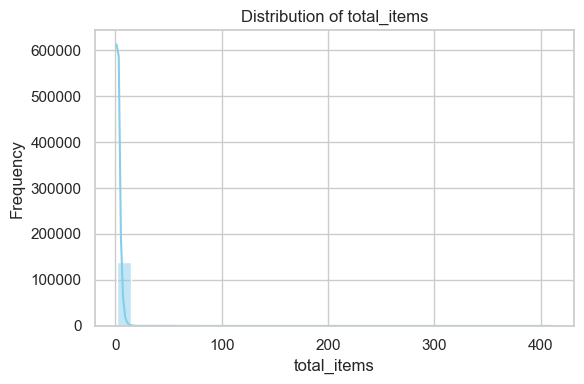

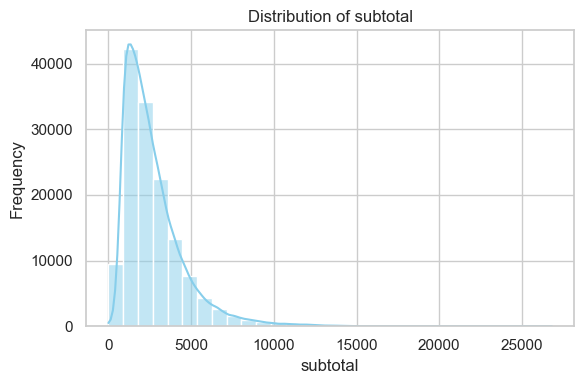

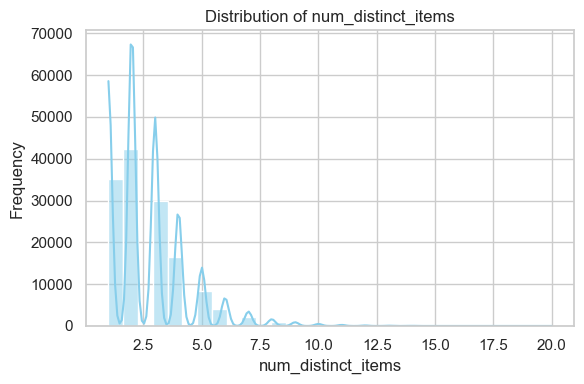

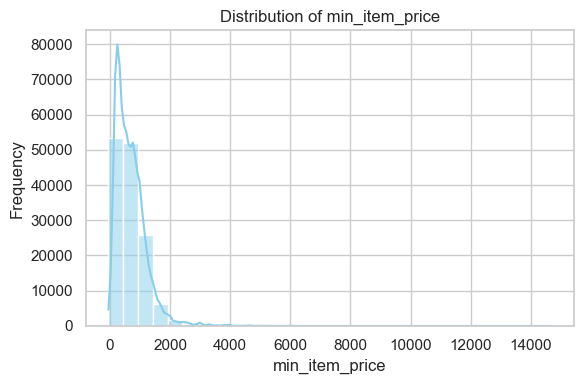

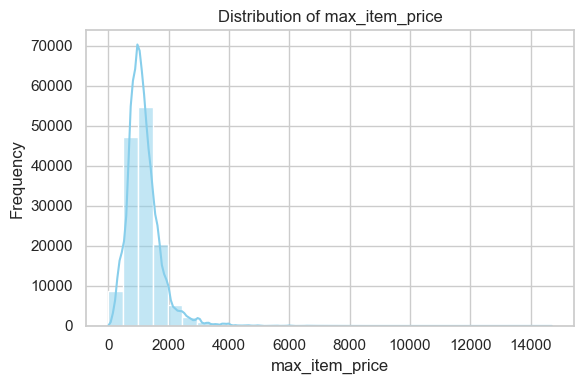

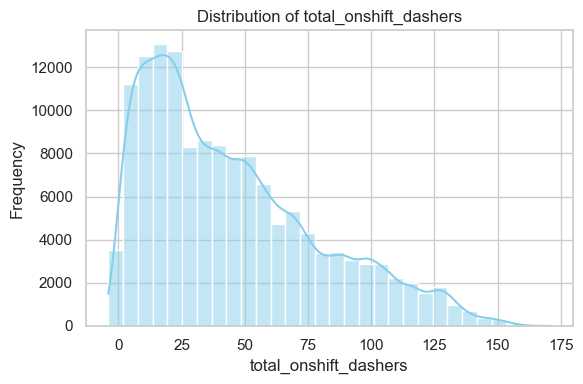

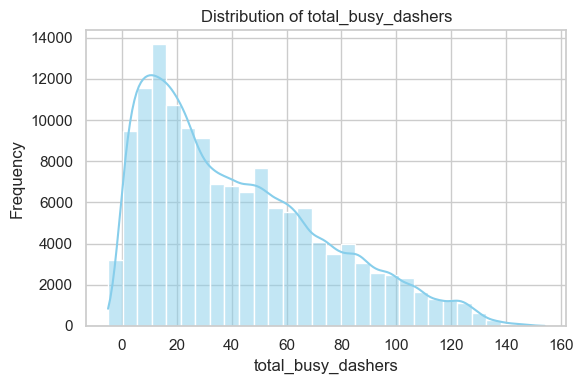

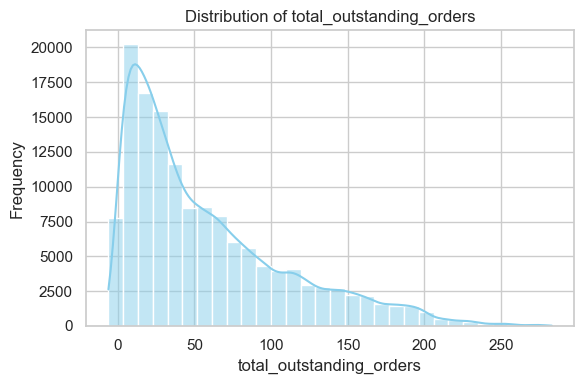

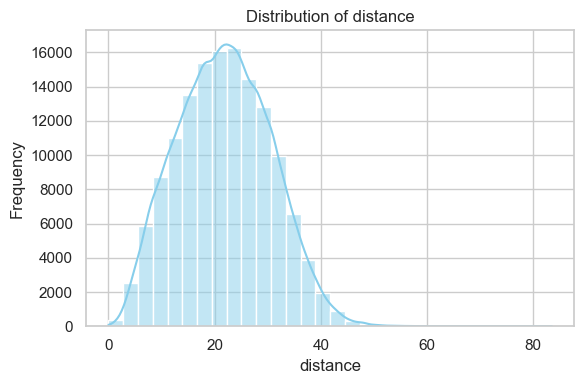

In [21]:
# Plot distributions for all numerical columns

true_numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
    'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
    'total_outstanding_orders', 'distance'
]

# Set up plot aesthetics
sns.set(style="whitegrid")

# Plot histograms for each true numerical column
for col in true_numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

/var/folders/ch/hp1p1zhn3yj_ygbkys9y_6800000gn/T/ipykernel_1237/1672794745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='pastel', order=X_train[col].value_counts().index)


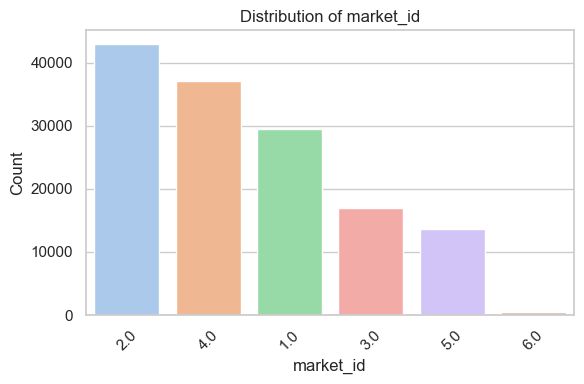

/var/folders/ch/hp1p1zhn3yj_ygbkys9y_6800000gn/T/ipykernel_1237/1672794745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='pastel', order=X_train[col].value_counts().index)


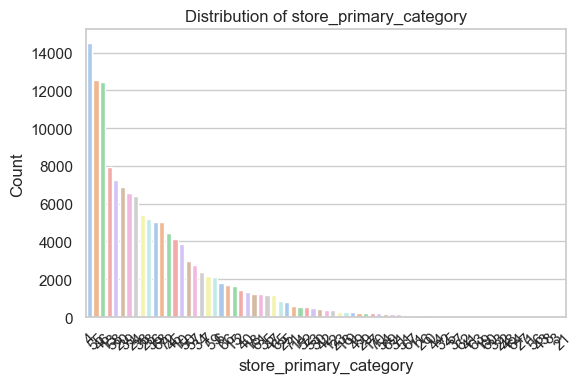

/var/folders/ch/hp1p1zhn3yj_ygbkys9y_6800000gn/T/ipykernel_1237/1672794745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='pastel', order=X_train[col].value_counts().index)


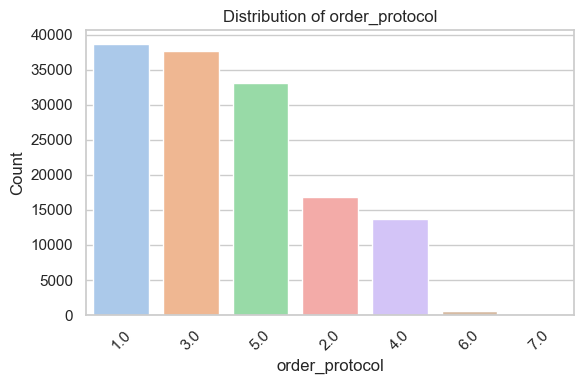

In [22]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_train, x=col, palette='pastel', order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

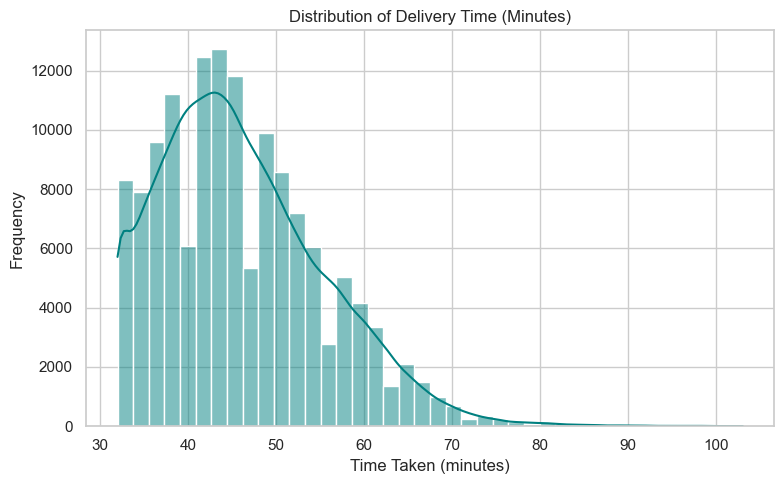

In [23]:
#distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=40, kde=True, color='teal')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

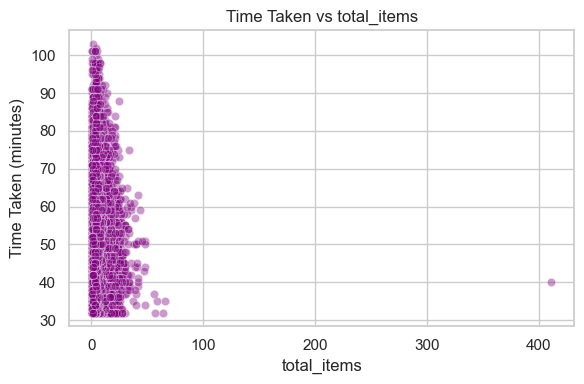

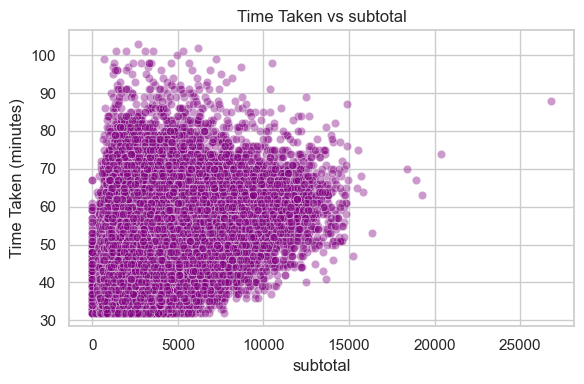

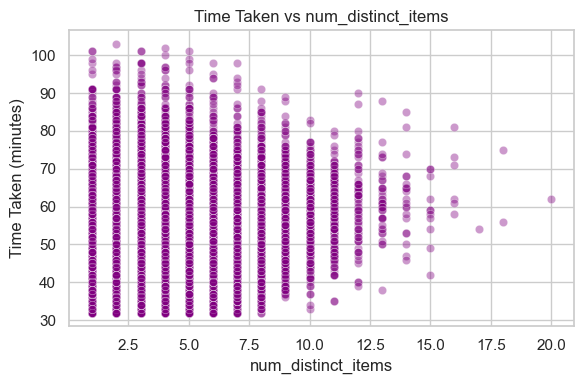

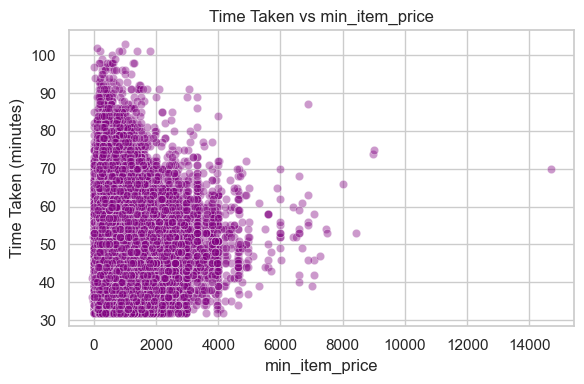

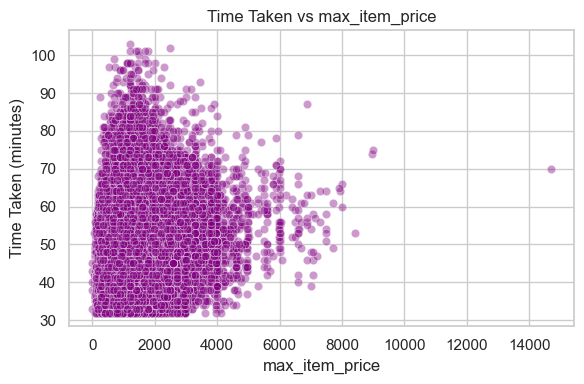

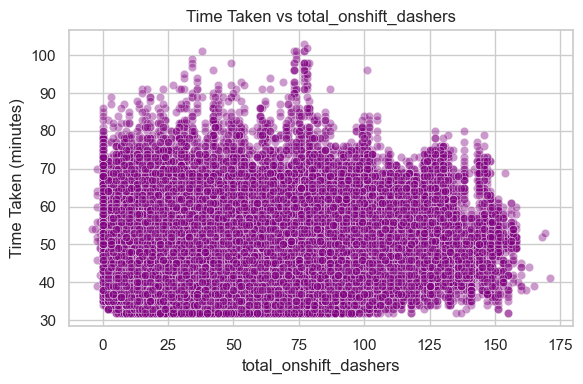

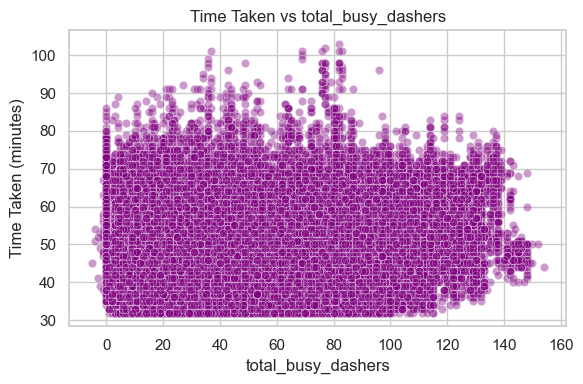

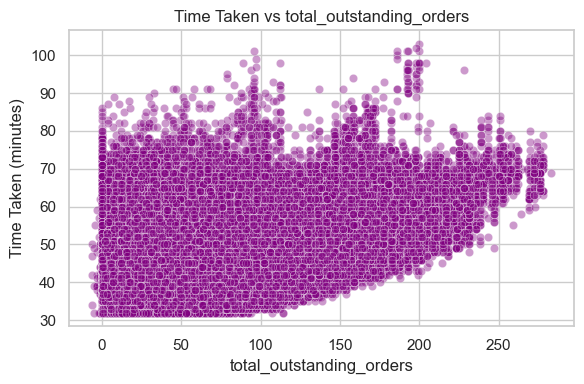

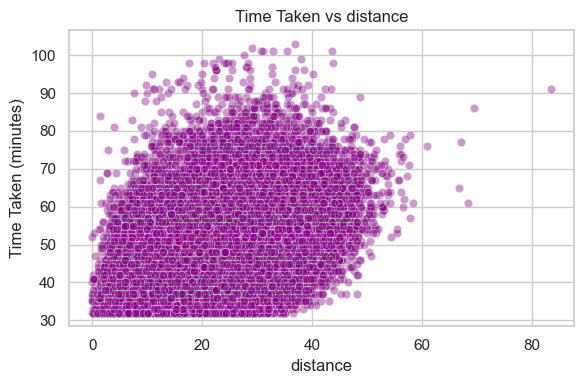

In [24]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in true_numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.4, color='purple')
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.tight_layout()
    plt.show()

/var/folders/ch/hp1p1zhn3yj_ygbkys9y_6800000gn/T/ipykernel_1237/4084539294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['order_hour'], y=y_train, palette='viridis')


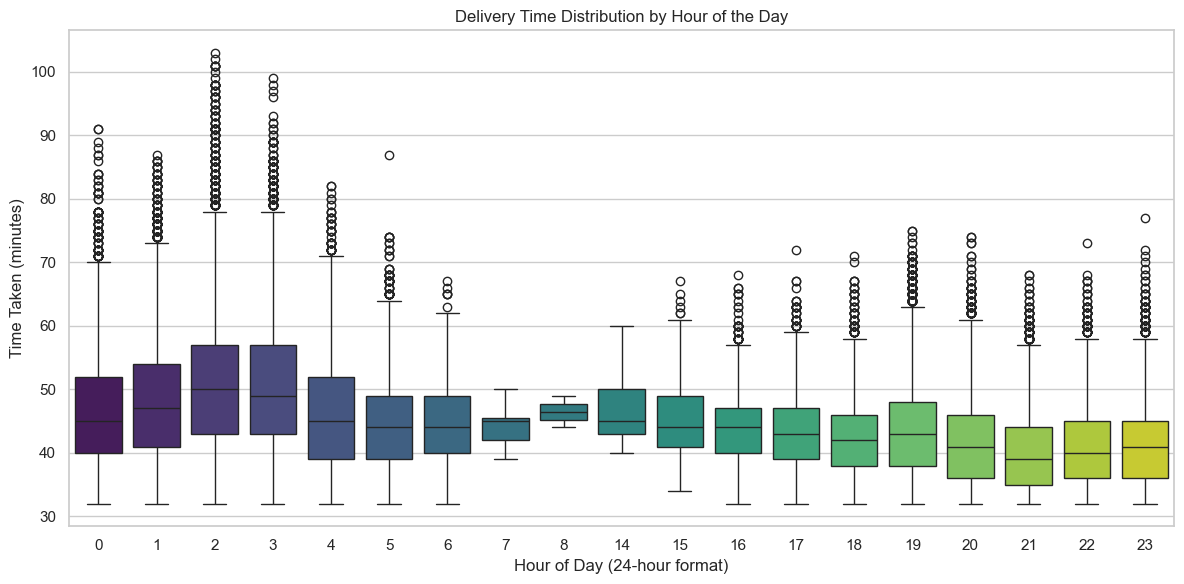

In [25]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='viridis')
plt.title('Delivery Time Distribution by Hour of the Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Time Taken (minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

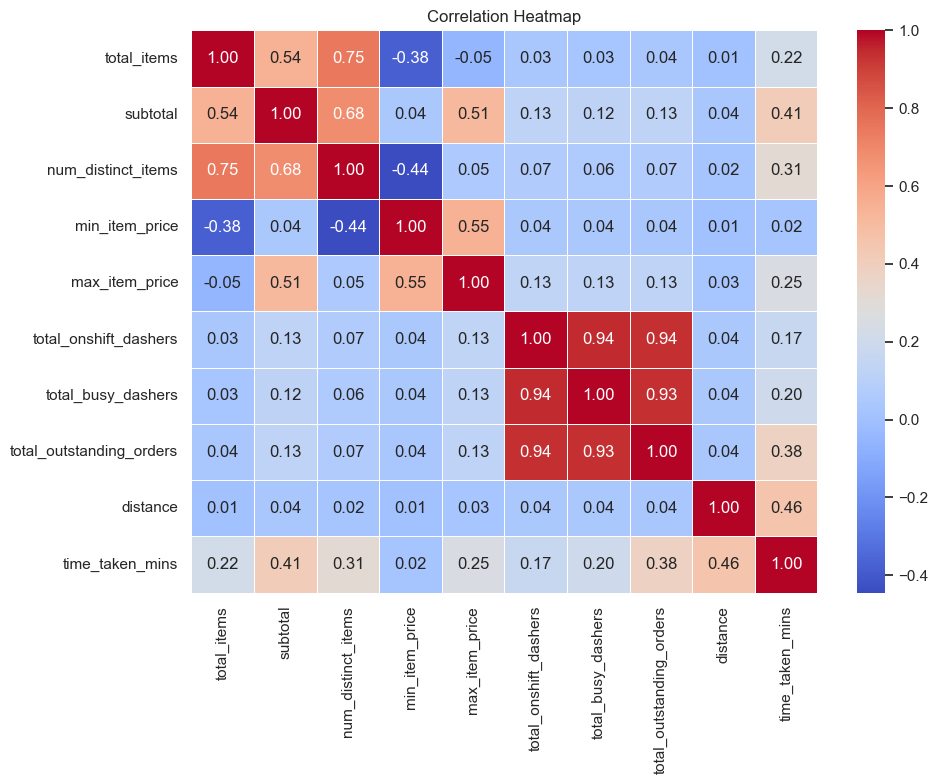

In [26]:
# Plot the heatmap of the correlation matrix

df_corr = X_train[true_numerical_cols].copy()
df_corr['time_taken_mins'] = y_train

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [27]:
# Compute correlation matrix (numerical features + target)
correlation_matrix = df_corr.corr()

# Print the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix.round(2))

Correlation Matrix:

                          total_items  subtotal  num_distinct_items  \
total_items                      1.00      0.54                0.75   
subtotal                         0.54      1.00                0.68   
num_distinct_items               0.75      0.68                1.00   
min_item_price                  -0.38      0.04               -0.44   
max_item_price                  -0.05      0.51                0.05   
total_onshift_dashers            0.03      0.13                0.07   
total_busy_dashers               0.03      0.12                0.06   
total_outstanding_orders         0.04      0.13                0.07   
distance                         0.01      0.04                0.02   
time_taken_mins                  0.22      0.41                0.31   

                          min_item_price  max_item_price  \
total_items                        -0.38           -0.05   
subtotal                            0.04            0.51   
num_distinct_item

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [28]:
# Drop 3-5 weakly correlated columns from training dataset
X_train=X_train.drop(['min_item_price','total_onshift_dashers','total_busy_dashers'],axis=1)


In [29]:
# Drop 3-5 weakly correlated columns from test dataset
X_test=X_test.drop(['min_item_price','total_onshift_dashers','total_busy_dashers'],axis=1)

In [30]:
X_test.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
139667       1.0                     45            1.0            3      1295   
80077        1.0                      4            1.0            2      2950   
41872        1.0                     46            4.0            1      1395   
165269       4.0                     24            5.0            2      2967   
151215       4.0                      6            2.0            3      1250   

        num_distinct_items  max_item_price  total_outstanding_orders  \
139667                   2             995                      61.0   
80077                    1            1225                      16.0   
41872                    1            1395                      45.0   
165269                   2            1249                     200.0   
151215                   2             400                      33.0   

        distance  order_hour  day_week_Monday  day_week_Saturday  \
139667     20.56           3                0                  0   
80077      12.84           1                0                  1   
41872      16.80           3                0                  0   
165269     19.00           3                0                  1   
151215     26.72          22                0                  1   

        day_week_Sunday  day_week_Thursday  day_week_Tuesday  \
139667                0                  0                 0   
80077                 0                  0                 0   
41872                 0                  1                 0   
165269                0                  0                 0   
151215                0                  0                 0   

        day_week_Wednesday  isWeekend_True  
139667                   0               0  
80077                    0               1  
41872                    0               0  
165269                   0               1  
151215                   0               1

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

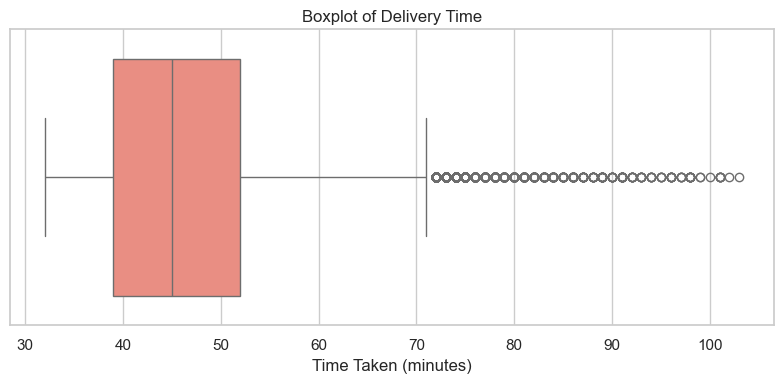

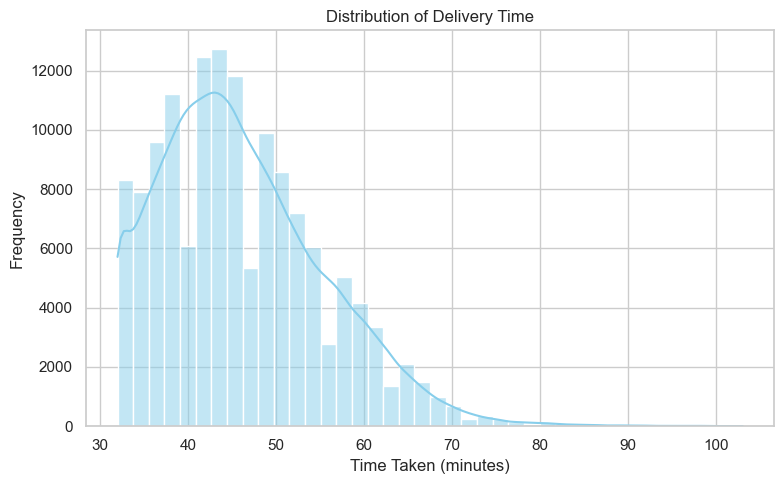

In [31]:
# Boxplot for time_taken

plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train, color='salmon')
plt.title("Boxplot of Delivery Time")
plt.xlabel("Time Taken (minutes)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=40, kde=True, color='skyblue')
plt.title("Distribution of Delivery Time")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


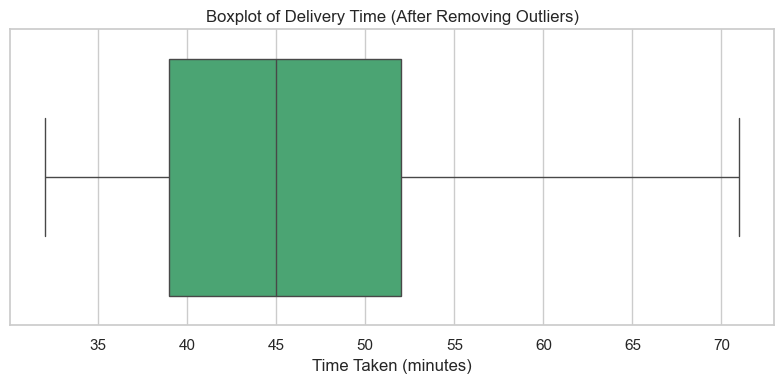

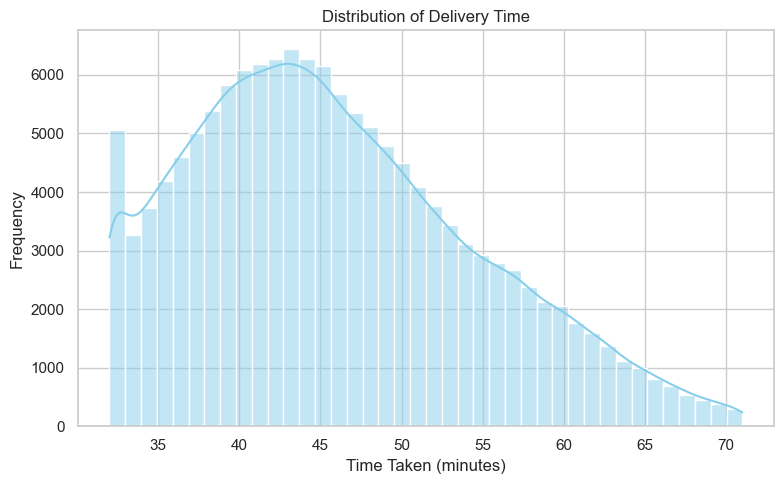

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [32]:
#outlier treatment 

# Calculate Q1, Q3, and IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

Lower Bound: 19.50
Upper Bound: 71.50


In [33]:
# Create a mask for values within the bounds
mask = (y_train >= lower_bound) & (y_train <= upper_bound)

# Filter both X_train and y_train
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

print(f"Original samples: {len(y_train)}")
print(f"After removing outliers: {len(y_train_filtered)}")

Original samples: 140621
After removing outliers: 139204


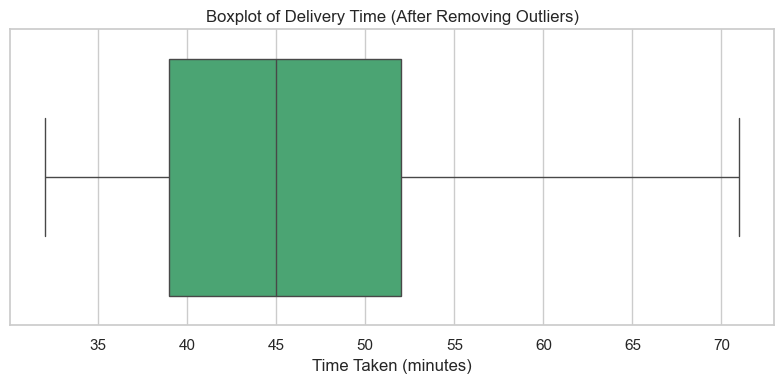

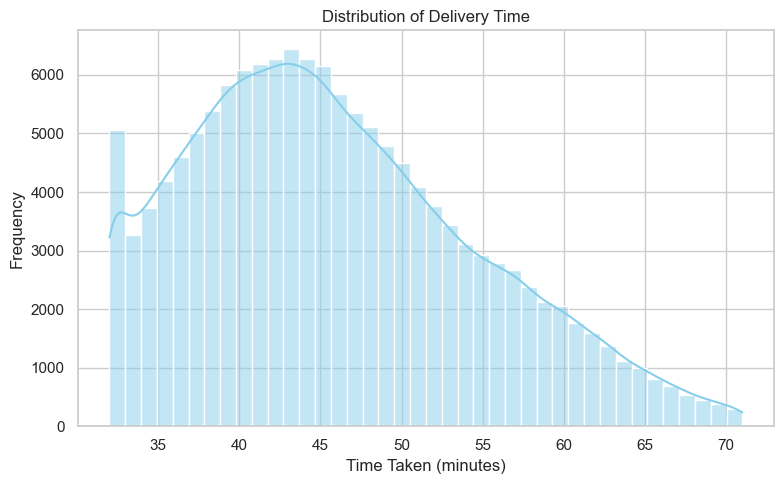

In [34]:
#Visualize the Cleaned Target Again

plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train_filtered, color='mediumseagreen')
plt.title("Boxplot of Delivery Time (After Removing Outliers)")
plt.xlabel("Time Taken (minutes)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(y_train_filtered, bins=40, kde=True, color='skyblue')
plt.title("Distribution of Delivery Time")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [35]:
#Replace Original X_train, y_train
X_train = X_train_filtered.copy()
y_train = y_train_filtered.copy()
print(X_train.shape)
print(y_train.shape)

(139204, 17)
(139204,)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [211]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#Numerical Columns
numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items',
    'max_item_price','total_outstanding_orders', 'distance'
]
#fit on training data
X_train[numerical_cols]=scaler.fit_transform (X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [214]:
# Apply scaling to the numerical column of y 
from sklearn.preprocessing import MinMaxScaler

# Create a new scaler just for y
y_scaler = MinMaxScaler()

# Fit on y_train and transform both y_train and y_test
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Optional: Convert back to Series
y_train = pd.Series(y_train_scaled.flatten(), index=y_train.index, name='time_taken_mins')
y_test = pd.Series(y_test_scaled.flatten(), index=y_test.index, name='time_taken_mins')




In [217]:
y_test.head(5)

139667    39.0
80077     42.0
41872     48.0
165269    55.0
151215    37.0
Name: time_taken_mins, dtype: float64

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [36]:
# Create/Initialise the model
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_taken_mins   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:06:38   Log-Likelihood:            -4.4398e+05
No. Observations:              139204   AIC:                         8.880e+05
Df Residuals:                  139187   BIC:                         8.882e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.9352      0.094    351.435      0.000      32.752      33.119
market_id                   -0.6240      0.012    -52.422      0.000      -0.647      -0.601
store_primary_category       0.0030      0.001      3.862      0.000       0.001       0.004
order_protocol              -0.9287      0.011    -87.299      0.000      -0.950      -0.908
total_items                 -0.0142      0.009     -1.581      0.114      -0.032       0.003
subtotal                     0.0012   1.61e-05     72.459      0.000       0.001       0.001
num_distinct_items           0.5310      0.018     30.340      0.000       0.497       0.565
max_item_price               0.0004   3.87e-05     10.762      0.000       0.000       0.000
total_outstanding_orders     0.0456      0.000    136.027      0.000       0.045       0.046
distance                     0.4485      0.002    247.788      0.000       0.445       0.452
order_hour                  -0.1758      0.002    -88.769      0.000      -0.180      -0.172
day_week_Monday              2.8265      0.060     47.038      0.000       2.709       2.944
day_week_Saturday            1.0066      0.031     32.036      0.000       0.945       1.068
day_week_Sunday              0.7412      0.032     23.512      0.000       0.679       0.803
day_week_Thursday            0.5943      0.060      9.863      0.000       0.476       0.712
day_week_Tuesday             0.6060      0.061      9.902      0.000       0.486       0.726
day_week_Wednesday          -0.2795      0.061     -4.588      0.000      -0.399      -0.160
isWeekend_True               1.7478      0.033     53.005      0.000       1.683       1.812
==============================================================================
Omnibus:                      407.762   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.233
Skew:                           0.129   Prob(JB):                     3.05e-90
Kurtosis:                       3.063   Cond. No.                     1.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
#create dataframe which will contain name of all feature variables and their respective VIFs

vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


features    VIF
16            isWeekend_True    inf
12           day_week_Sunday    inf
11         day_week_Saturday    inf
5         num_distinct_items  11.21
4                   subtotal  10.40
6             max_item_price   8.14
8                   distance   6.06
3                total_items   5.66
0                  market_id   4.79
2             order_protocol   4.41
1     store_primary_category   3.80
7   total_outstanding_orders   2.68
9                 order_hour   2.13
10           day_week_Monday   1.73
13         day_week_Thursday   1.72
15        day_week_Wednesday   1.69
14          day_week_Tuesday   1.67

In [38]:
#removing total_items with high p value

x=X_train.drop(['total_items'],axis=1)

In [39]:
# Create/Initialise the model again without total_items

X_train_sm=sm.add_constant(x)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_taken_mins   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:06:47   Log-Likelihood:            -4.4398e+05
No. Observations:              139204   AIC:                         8.880e+05
Df Residuals:                  139188   BIC:                         8.881e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.9230      0.093    352.500      0.000      32.740      33.106
market_id                   -0.6238      0.012    -52.409      0.000      -0.647      -0.600
store_primary_category       0.0030      0.001      3.904      0.000       0.001       0.004
order_protocol              -0.9292      0.011    -87.380      0.000      -0.950      -0.908
subtotal                     0.0012   1.57e-05     73.880      0.000       0.001       0.001
num_distinct_items           0.5172      0.015     34.103      0.000       0.487       0.547
max_item_price               0.0004   3.76e-05     11.461      0.000       0.000       0.001
total_outstanding_orders     0.0456      0.000    136.062      0.000       0.045       0.046
distance                     0.4485      0.002    247.852      0.000       0.445       0.452
order_hour                  -0.1758      0.002    -88.780      0.000      -0.180      -0.172
day_week_Monday              2.8267      0.060     47.041      0.000       2.709       2.944
day_week_Saturday            1.0065      0.031     32.034      0.000       0.945       1.068
day_week_Sunday              0.7412      0.032     23.514      0.000       0.679       0.803
day_week_Thursday            0.5945      0.060      9.867      0.000       0.476       0.713
day_week_Tuesday             0.6063      0.061      9.906      0.000       0.486       0.726
day_week_Wednesday          -0.2794      0.061     -4.587      0.000      -0.399      -0.160
isWeekend_True               1.7478      0.033     53.005      0.000       1.683       1.812
==============================================================================
Omnibus:                      408.240   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.719
Skew:                           0.130   Prob(JB):                     2.39e-90
Kurtosis:                       3.063   Cond. No.                     1.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
#calculate the VIFs again after removing total_items

vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


features   VIF
10         day_week_Saturday   inf
11           day_week_Sunday   inf
15            isWeekend_True   inf
3                   subtotal  9.96
4         num_distinct_items  7.97
5             max_item_price  7.73
7                   distance  6.06
0                  market_id  4.79
2             order_protocol  4.40
1     store_primary_category  3.80
6   total_outstanding_orders  2.68
8                 order_hour  2.13
9            day_week_Monday  1.73
12         day_week_Thursday  1.72
14        day_week_Wednesday  1.69
13          day_week_Tuesday  1.67

In [41]:
#isWeekend_True has a very high VIF , we will build model again after removing isWeekend_True

x=x.drop(['isWeekend_True'],axis=1)

In [42]:
x.head(5)

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0      1350   
58452        2.0                     46            5.0      4285   
20644        4.0                     45            2.0      7880   
79735        4.0                     45            2.0      3660   
167933       1.0                      4            5.0      8575   

        num_distinct_items  max_item_price  total_outstanding_orders  \
42111                    1            1350                      19.0   
58452                    5             900                     207.0   
20644                    3            1450                     115.0   
79735                    3            1450                     173.0   
167933                   5            2625                      61.0   

        distance  order_hour  day_week_Monday  day_week_Saturday  \
42111       9.60          20                1                  0   
58452      34.56           2                0                  1   
20644      34.92           3                0                  0   
79735      25.76           2                0                  1   
167933     17.72           2                0                  0   

        day_week_Sunday  day_week_Thursday  day_week_Tuesday  \
42111                 0                  0                 0   
58452                 0                  0                 0   
20644                 0                  0                 0   
79735                 0                  0                 0   
167933                0                  1                 0   

        day_week_Wednesday  
42111                    0  
58452                    0  
20644                    0  
79735                    0  
167933                   0

In [43]:
# Create/Initialise the model again without isWeekend_True

X_train_sm=sm.add_constant(x)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_taken_mins   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:06:56   Log-Likelihood:            -4.4398e+05
No. Observations:              139204   AIC:                         8.880e+05
Df Residuals:                  139188   BIC:                         8.881e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.9230      0.093    352.500      0.000      32.740      33.106
market_id                   -0.6238      0.012    -52.409      0.000      -0.647      -0.600
store_primary_category       0.0030      0.001      3.904      0.000       0.001       0.004
order_protocol              -0.9292      0.011    -87.380      0.000      -0.950      -0.908
subtotal                     0.0012   1.57e-05     73.880      0.000       0.001       0.001
num_distinct_items           0.5172      0.015     34.103      0.000       0.487       0.547
max_item_price               0.0004   3.76e-05     11.461      0.000       0.000       0.001
total_outstanding_orders     0.0456      0.000    136.062      0.000       0.045       0.046
distance                     0.4485      0.002    247.852      0.000       0.445       0.452
order_hour                  -0.1758      0.002    -88.780      0.000      -0.180      -0.172
day_week_Monday              2.8267      0.060     47.041      0.000       2.709       2.944
day_week_Saturday            2.7543      0.056     49.033      0.000       2.644       2.864
day_week_Sunday              2.4890      0.056     44.175      0.000       2.379       2.599
day_week_Thursday            0.5945      0.060      9.867      0.000       0.476       0.713
day_week_Tuesday             0.6063      0.061      9.906      0.000       0.486       0.726
day_week_Wednesday          -0.2794      0.061     -4.587      0.000      -0.399      -0.160
==============================================================================
Omnibus:                      408.240   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.719
Skew:                           0.130   Prob(JB):                     2.39e-90
Kurtosis:                       3.063   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#calculate the VIFs again after removing isWeekend_True
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
3                   subtotal  9.96
4         num_distinct_items  7.97
5             max_item_price  7.73
7                   distance  6.06
0                  market_id  4.79
2             order_protocol  4.40
1     store_primary_category  3.80
6   total_outstanding_orders  2.68
8                 order_hour  2.13
10         day_week_Saturday  2.03
11           day_week_Sunday  1.98
9            day_week_Monday  1.73
12         day_week_Thursday  1.72
14        day_week_Wednesday  1.69
13          day_week_Tuesday  1.67

In [45]:
#subtotal has a very high VIF , we will build model again after removing subtotal

x=x.drop(['subtotal'],axis=1)

In [46]:
# Create/Initialise the model again without subtotal

X_train_sm=sm.add_constant(x)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_taken_mins   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:07:02   Log-Likelihood:            -4.4666e+05
No. Observations:              139204   AIC:                         8.933e+05
Df Residuals:                  139189   BIC:                         8.935e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.5687      0.093    338.139      0.000      31.386      31.752
market_id                   -0.6366      0.012    -52.471      0.000      -0.660      -0.613
store_primary_category       0.0066      0.001      8.435      0.000       0.005       0.008
order_protocol              -0.9262      0.011    -85.440      0.000      -0.947      -0.905
num_distinct_items           1.3675      0.010    135.822      0.000       1.348       1.387
max_item_price               0.0022   2.94e-05     75.210      0.000       0.002       0.002
total_outstanding_orders     0.0463      0.000    135.443      0.000       0.046       0.047
distance                     0.4496      0.002    243.715      0.000       0.446       0.453
order_hour                  -0.1795      0.002    -88.937      0.000      -0.183      -0.176
day_week_Monday              2.8225      0.061     46.077      0.000       2.702       2.943
day_week_Saturday            2.7498      0.057     48.021      0.000       2.638       2.862
day_week_Sunday              2.4949      0.057     43.436      0.000       2.382       2.607
day_week_Thursday            0.6162      0.061     10.031      0.000       0.496       0.737
day_week_Tuesday             0.6119      0.062      9.808      0.000       0.490       0.734
day_week_Wednesday          -0.2599      0.062     -4.185      0.000      -0.382      -0.138
==============================================================================
Omnibus:                      451.540   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.227
Skew:                           0.138   Prob(JB):                    8.54e-100
Kurtosis:                       3.049   Cond. No.                     9.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#calculate the VIFs again after removing subtotal
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
6                   distance  6.02
0                  market_id  4.75
4             max_item_price  4.68
2             order_protocol  4.38
1     store_primary_category  3.80
3         num_distinct_items  3.48
5   total_outstanding_orders  2.68
7                 order_hour  2.11
9          day_week_Saturday  2.02
10           day_week_Sunday  1.98
8            day_week_Monday  1.72
11         day_week_Thursday  1.71
13        day_week_Wednesday  1.68
12          day_week_Tuesday  1.67

In [48]:
# Make predictions

X_test_sm=sm.add_constant(X_test)
X_test_sm.head(5)

const market_id store_primary_category order_protocol  total_items  \
139667    1.0       1.0                     45            1.0            3   
80077     1.0       1.0                      4            1.0            2   
41872     1.0       1.0                     46            4.0            1   
165269    1.0       4.0                     24            5.0            2   
151215    1.0       4.0                      6            2.0            3   

        subtotal  num_distinct_items  max_item_price  \
139667      1295                   2             995   
80077       2950                   1            1225   
41872       1395                   1            1395   
165269      2967                   2            1249   
151215      1250                   2             400   

        total_outstanding_orders  distance  order_hour  day_week_Monday  \
139667                      61.0     20.56           3                0   
80077                       16.0     12.84           1                0   
41872                       45.0     16.80           3                0   
165269                     200.0     19.00           3                0   
151215                      33.0     26.72          22                0   

        day_week_Saturday  day_week_Sunday  day_week_Thursday  \
139667                  0                0                  0   
80077                   1                0                  0   
41872                   0                0                  1   
165269                  1                0                  0   
151215                  1                0                  0   

        day_week_Tuesday  day_week_Wednesday  isWeekend_True  
139667                 0                   0               0  
80077                  0                   0               1  
41872                  0                   0               0  
165269                 0                   0               1  
151215                 0                   0               1

In [49]:
X_test_sm=X_test_sm.drop(['isWeekend_True','total_items','subtotal'],axis=1)


In [50]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [51]:
# Find results for evaluation metrics

r2_score(y_true=y_test, y_pred=y_test_pred)

0.5409753571597122

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [53]:
# Loop through the number of features and test the model

# List of all feature names 
feature_names = X_train_sm.columns

# Empty lists to store performance metrics
num_features_list = []
mse_scores = []
r2_scores = []



In [54]:
# Try all feature subset sizes from 1 to total number of features
for k in range(1, len(feature_names) + 1):
    # Define estimator and RFE
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=k)
    
    # Fit RFE on training data
    rfe.fit(X_train_sm, y_train)
    
    # Select the features marked as True by RFE
    selected_features = feature_names[rfe.support_]
    
    # Fit model using selected features
    model.fit(X_train_sm[selected_features], y_train)
    
    # Predict on test data
    y_test_pred = model.predict(X_test_sm[selected_features])
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    # Store metrics
    num_features_list.append(k)
    mse_scores.append(mse)
    r2_scores.append(r2)


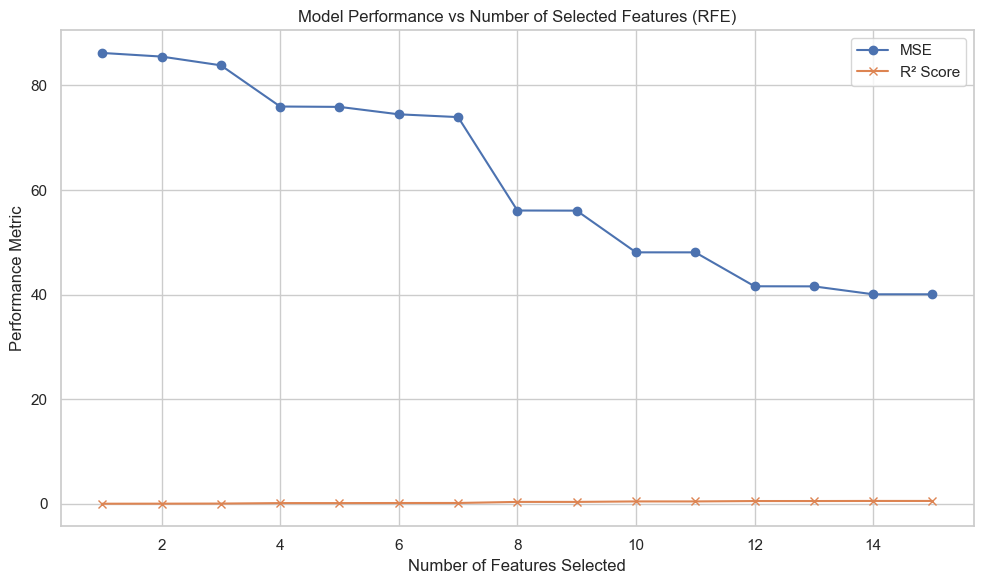

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, mse_scores, marker='o', label='MSE')
plt.plot(num_features_list, r2_scores, marker='x', label='R² Score')
plt.xlabel("Number of Features Selected")
plt.ylabel("Performance Metric")
plt.title("Model Performance vs Number of Selected Features (RFE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
# Find the index of the best R² score or lowest MSE
best_index = np.argmax(r2_scores)
best_feature_count = num_features_list[best_index]
print(f"Optimal number of features: {best_feature_count}")
selected_features = feature_names[
    RFE(estimator=LinearRegression(), n_features_to_select=best_feature_count)
    .fit(X_train_sm, y_train)
    .support_
]


Optimal number of features: 14


In [60]:
# Build the final model with selected number of features

best_feature_count = 14

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model
final_model = LinearRegression()

# Use RFE to select top `k` features
rfe_final = RFE(final_model, n_features_to_select=best_feature_count)
rfe_final.fit(X_train_sm, y_train)

# Get selected features
selected_features = X_train_sm.columns[rfe_final.support_]
print("Selected Features for Final Model:")
print(selected_features.tolist())


Selected Features for Final Model:
['market_id', 'store_primary_category', 'order_protocol', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour', 'day_week_Monday', 'day_week_Saturday', 'day_week_Sunday', 'day_week_Thursday', 'day_week_Tuesday', 'day_week_Wednesday']


In [61]:
# Fit model on training data using selected features
final_model.fit(X_train_sm[selected_features], y_train)

# Predict on test data
y_test_pred = final_model.predict(X_test_sm[selected_features])


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"\n Final Model Evaluation:")
print(f"Selected Features: {len(selected_features)}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



 Final Model Evaluation:
Selected Features: 14
MSE: 40.0611
R² Score: 0.5410


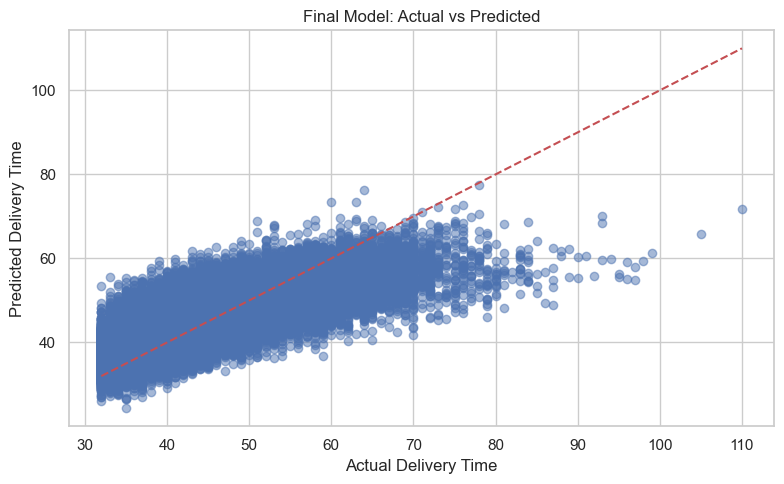

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Final Model: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [244]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred=lr_model.predict(X_train_sm)

/var/folders/ch/hp1p1zhn3yj_ygbkys9y_6800000gn/T/ipykernel_8563/2954083994.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

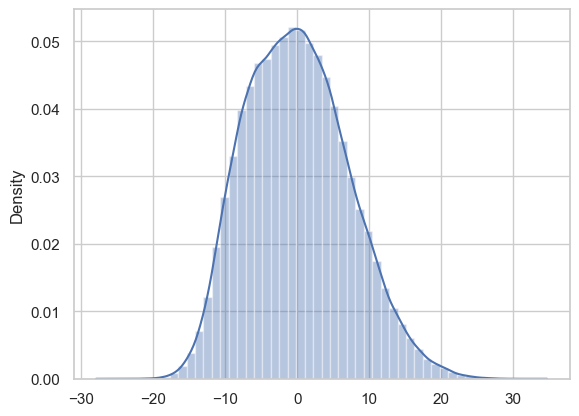

In [245]:
res=y_train-y_train_pred
sns.distplot(res)

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
Each coefficient tells how much time_taken_mins changes with a 1 unit increase in feature keeping all other features constant.
For e.g. distance has coefficient of 0.45 which indicates For every additional 1 km, delivery time increases by 0.45 mins, assuming other factors are fixed.

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



In [ ]:
Key Inferences
1.City/market, order method, and day of the week all strongly influence delivery time.
2.Weekends and Mondays are the slowest days.
3.Order protocol and city differences present strong opportunities for operational optimization.
4.Restaurant type has minimal independent impact when controlling for other factors.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



In [ ]:
test_size=0.2 → 20% , indicates that of the whole of data 20% becomes test set.
The other 80% becomes training set.
This helps in:
    1.Train the model on training data
    2.Evaluate how well it performs on unseen test data

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



In [ ]:
Based on the correlation matrix, the variable with the highest correlation with the target variable time_taken_mins is 'distance' 
=0.46 . This would infer that longer delivery distances lead to longer delivery times.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



In [ ]:
Approach to Detecting Outliers
1. Boxplots / Visual Inspection
    This helped visually identify extreme values (outliers).
    In boxplots, points outside the whiskers (typically beyond 1.5×IQR) are considered outliers.
2. IQR Method (Interquartile Range)
    I used the IQR method programmatically to detect outliers in each numerical column.
Rows were removed where numerical features fall outside [Q1 − 1.5×IQR, Q3 + 1.5×IQR]

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



In [ ]:
 Most Impactful Features (based on magnitude of coefficients and significance):
1. distance (+0.45)
Longer distances increase delivery time significantly
2.num_distinct_items (+1.37)
More variety in the order (more different items) tends to increase prep time, hence increasing delivery time.
3.order_protocol (−0.93)
Certain ordering methods (like app-based vs phone) lead to faster deliveries, showing that ordering flow matters operationally.
4.day_week_Saturday	(+2.75)
Weekends see significantly higher delivery times

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



In [ ]:
Linear Regression is a supervised machine learning algorithm used for predicting a continuous output (target variable)
based on one or more input features.

Goal of Linear Regression
Minimize the difference between actual and predicted values.

Assumptions of Linear Regression
1.Linearity – Relationship between features and target is linear
2.Independence – Observations are independent
3.Homoscedasticity – Constant variance of errors
4.Normality of Errors – Residuals are normally distributed
5.No multicollinearity – Features are not too correlated

Once trained, the model gives:
Intercept (β₀): baseline value of the prediction
Coefficients (β₁ to βₙ): how much the target changes with a unit change in each feature
p-values: whether the feature’s effect is statistically significant
R² Score: proportion of variance in y explained by X



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



In [ ]:
Simple Linear Regression: 	Uses one independent variable to predict a dependent variable.
Multiple Linear Regression: Uses two or more independent variables to predict a dependent variable.

Use Case:
Simple Linear Regression
1. Predict house price from square foot
2.Predict delivery time from distance

Multiple Linear Regression
1.Predict house price from square foot, number of rooms, location, etc.
2.Predict delivery time from distance, order size, day of week, etc.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



In [ ]:
The cost function is a mathematical formula that measures how well the linear regression model is performing.It calculates the difference between the predicted values and 
the actual values of the target variable.
In linear regression, the most commonly used cost function is:MSE(Mean squared error)

Two Main Ways to Minimize the Cost Function:
1. Analytical Method: Ordinary Least Squares (OLS)
2. Iterative Method: Gradient Descent

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



In [ ]:
Underfitting: The model is too simple to capture the underlying pattern in the data.
Characteristics:
High error on training data
High error on test data
The model misses key patterns (poor learning)

Overfitting: The model is too complex, and learns not only the pattern but also the noise in the training data.
Characteristics:
Very low error on training data
High error on test data
The model memorizes the training data, but fails to generalize

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

In [ ]:
A residual is the difference between the actual value and the predicted value.
Residual Plots Can help Reveal following:
1. Non-Linearity
    Pattern (e.g., curve or wave) in the residuals
    Suggests that the relationship between predictors and target is not linear

2. Heteroscedasticity (Non-constant variance)
    Residuals fan out or funnel (increasing or decreasing spread)
    Indicates unequal variance in errors — violates a key linear regression assumption

3. Outliers
    Extreme values far from the cloud of points
    Suggests the model is heavily influenced by a few observations

4. Autocorrelation
    If residuals show a pattern over time
    This indicates correlated errors — common in time series data
